# GRIP Task 1 Data_Science_&_Business_Analytics

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import warnings as wa
wa.filterwarnings("ignore")

In [14]:
data=pd.read_csv("C:/Users/Niharika/Desktop/MBA-BA-4th sem/SF/Iris.csv")

In [15]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
iris=pd.DataFrame(data)
iris_data=iris.drop(columns=['Species','Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=data["Species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [19]:
iris_setosa=iris.loc[data["Species"]=="Iris-setosa"]
iris_virginica=iris.loc[data["Species"]=="Iris-virginica"]
iris_versicolor=iris.loc[data["Species"]=="Iris-versicolor"]

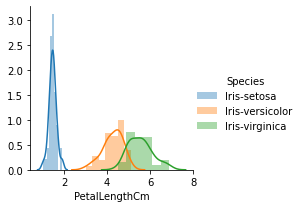

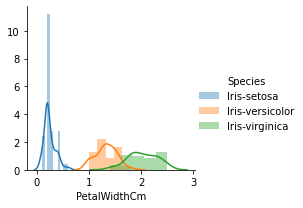

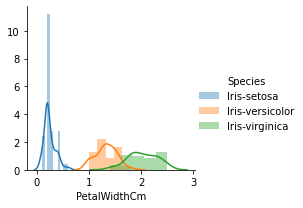

In [21]:
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalLengthCm").add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
sns.FacetGrid(data,hue="Species",size=3).map(sns.distplot,"PetalWidthCm").add_legend()
plt.show()

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

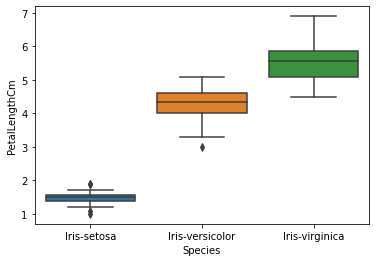

In [23]:
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

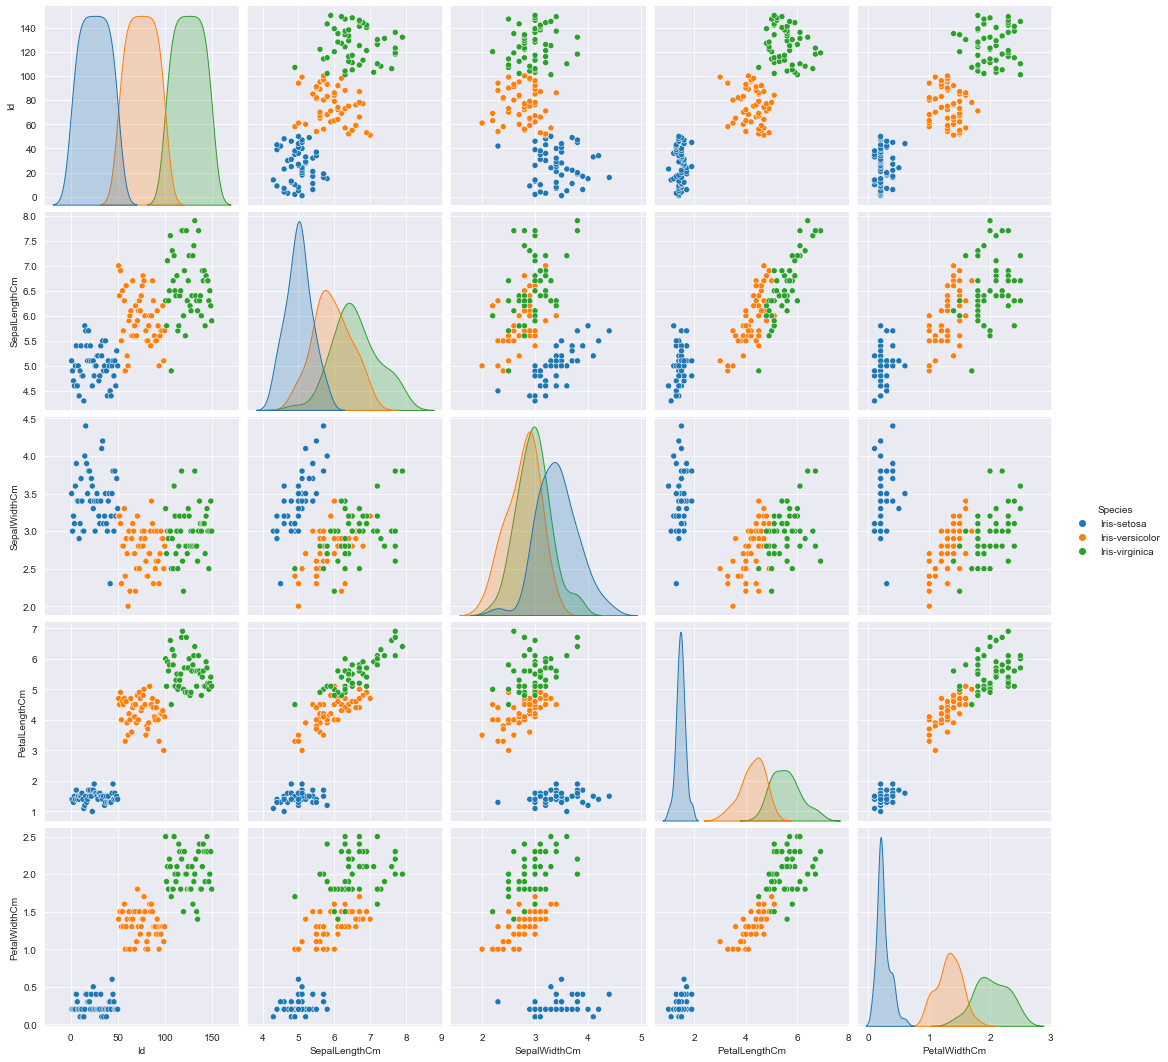

In [24]:
sns.set_style("darkgrid")
sns.pairplot(data,hue="Species",size=3);
plt.show()

In [25]:
within_cluster_sum_of_square=[]
clusters_range=range(1,15)
for k in clusters_range:
    km=KMeans(n_clusters=k)
    km=km.fit(iris_data)
    within_cluster_sum_of_square.append(km.inertia_)

In [29]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
predictions=model.fit_predict(iris_data)

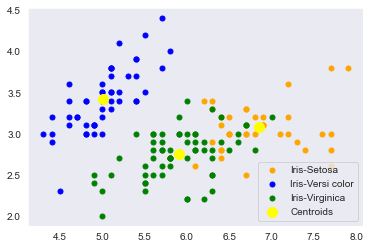

In [31]:
x=iris_data.iloc[:,[0,1,2,3]].values
plt.scatter(x[predictions==0,0], x[predictions==0,1], s=25, c='orange', label='Iris-Setosa')
plt.scatter(x[predictions==1,0], x[predictions==1,1], s=25, c='blue', label='Iris-Versi color')
plt.scatter(x[predictions==2,0], x[predictions==2,1], s=25, c='green', label='Iris-Virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],s=100, c='yellow', label='Centroids')
plt.legend()
plt.grid()
plt.show()